# 3D RFIM with OBC in z direction

## Initializing Spins 

<IPython.core.display.Javascript object>


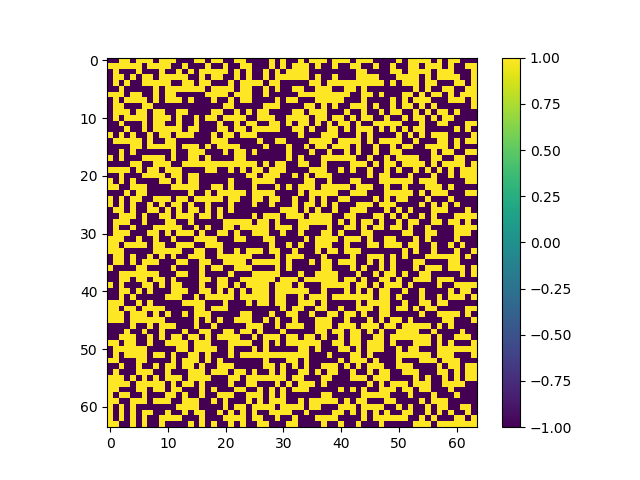

In [6]:
import numpy as np
import glob
import pandas as pd

import time
import numpy as np
import matplotlib
%matplotlib notebook
# matplotlib.use('TkAgg') # do this before importing pylab

import matplotlib.pyplot as plt

L=64
spin = np.random.randint(2,size=(L,L,L+1))*2.0-1.0
spin[:,:,L]=np.zeros((L,L))
fig = plt.figure()
plt.imshow(spin[:,:,L],vmin=-1,vmax=1)
plt.colorbar()
fig.canvas.draw()
time.sleep(1)

plt.imshow(spin[:,:,0],vmin=-1,vmax=1)
fig.canvas.draw()
plt.close()

## Initializing random fields

<IPython.core.display.Javascript object>


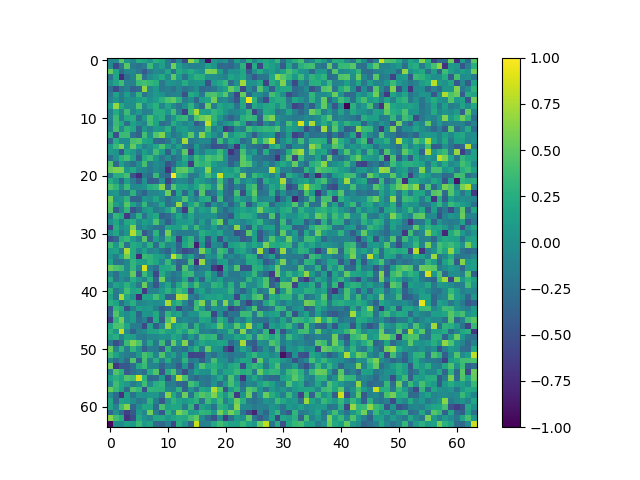

In [13]:
R=2.0
h = np.random.normal(0,R,size=(L,L,L+1))
h[:,:,L]=np.zeros((L,L))

fig = plt.figure()
plt.imshow(h[:,:,L],vmin=-1,vmax=1)
plt.colorbar()
fig.canvas.draw()
time.sleep(1)
plt.imshow(h[:,:,0])
fig.canvas.draw()
plt.close()

## Initializing checkerboard sites

<IPython.core.display.Javascript object>


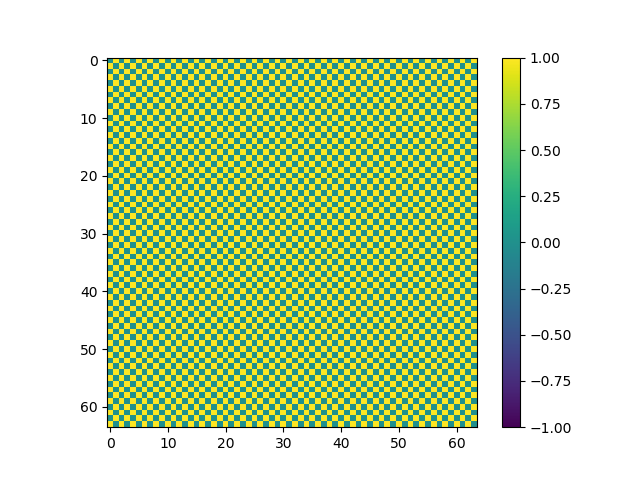

In [3]:
checkerboard = -1*np.ones((L,L,L+1))
for i in range(L):
    for j in range(L):
        for k in range(L):
            checkerboard[i,j,k] = (i+j+k)%2

fig = plt.figure()
plt.imshow(checkerboard[:,:,L],vmin=-1,vmax=1)
plt.colorbar()
fig.canvas.draw()
time.sleep(1)
plt.imshow(checkerboard[:,:,0],vmin=-1,vmax=1)
fig.canvas.draw()
plt.close()

### Check

<IPython.core.display.Javascript object>


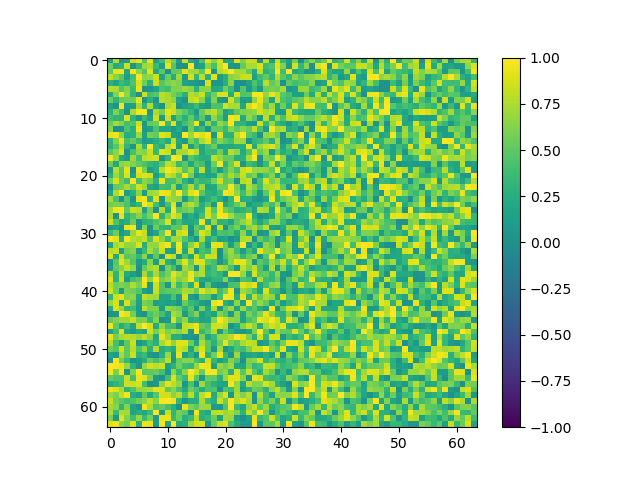

In [4]:
r = np.random.uniform(0,1,size=(L,L,L+1))
fig = plt.figure()
plt.imshow(r[:,:,L],vmin=-1,vmax=1)
plt.colorbar()
fig.canvas.draw()
time.sleep(1)
plt.imshow(r[:,:,0],vmin=-1,vmax=1)
fig.canvas.draw()
plt.close()

## Metropolis checkerboard updates

<IPython.core.display.Javascript object>


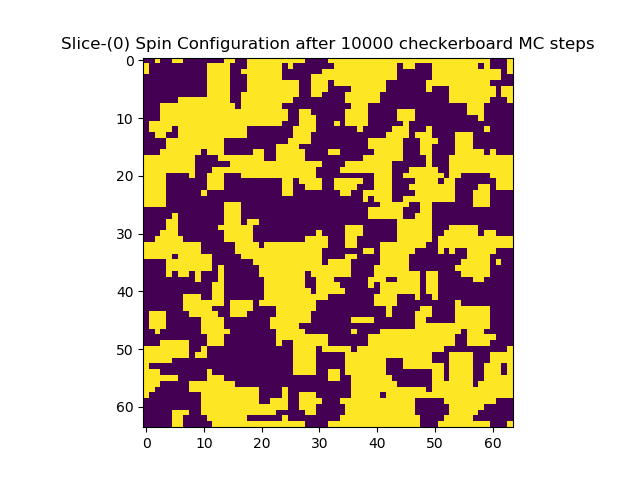

In [14]:
black_or_white = 0
T = 0.1                           # Temperature
total_steps = 10000
MC_step = 100
fig = plt.figure()
ax = fig.add_subplot(111)
fig.show()

spin_configs = []
spin_configs.append(spin[:,:,:L])
plt.imshow(spin[:,:,0],vmin=-1,vmax=1)
fig.canvas.draw()
time.sleep(0.9)

r = np.zeros((L,L,L+1))
for i in range(total_steps):
    delta_E = -2*spin*( np.roll(spin,1,axis=0)+np.roll(spin,-1,axis=0)
                       +np.roll(spin,1,axis=1)+np.roll(spin,-1,axis=1)
                       +np.roll(spin,1,axis=2)+np.roll(spin,-1,axis=2)
                       +h )
    
    prob = np.exp(delta_E/T) *  np.where(checkerboard==black_or_white,1.0,0.0)
    
    r[:,:,:L] = np.random.uniform(0,1,size=(L,L,L))
#     plt.imshow(prob>r)    
    
    spin = np.where(prob>r, -spin, spin)
    black_or_white = 1-black_or_white
    
    if (i+1)%100==0:
        spin_configs.append(spin[:,:,:L])
        plt.imshow(spin[:,:,0],vmin=-1,vmax=1)
        ax.set_title( 'Slice-('+str(0)+') Spin Configuration after '+str(i+1)+' checkerboard MC steps')
        fig.canvas.draw() 

plt.close()

## Replotting the configurations

<IPython.core.display.Javascript object>


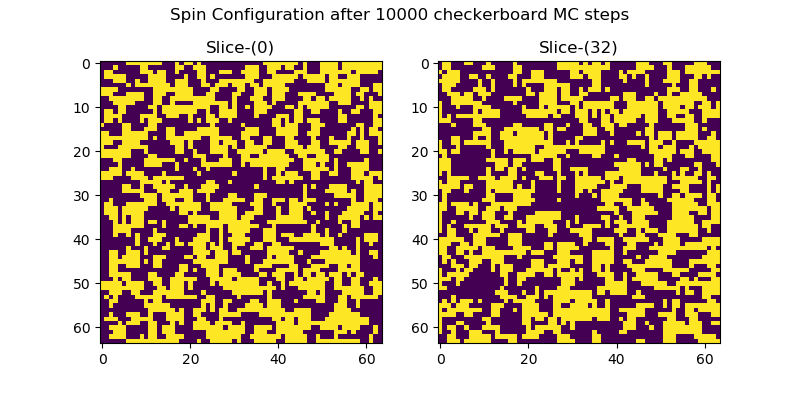

In [12]:
delay=0.01
fig, ax = plt.subplots(1,2,figsize=(8,4))

fig.show()
for i in range(np.shape(spin_configs)[0]):
    ax[0].imshow(spin_configs[i][:,:,0],vmin=-1,vmax=1)
    ax[1].imshow(spin_configs[i][:,:,int(L/2)],vmin=-1,vmax=1)
    ax[0].set_title( 'Slice-('+str(0)+')')
    ax[1].set_title( 'Slice-('+str(int(L/2))+')')
    fig.suptitle('Spin Configuration after '+str(i*MC_step)+' checkerboard MC steps')
    fig.canvas.draw() 
    time.sleep(delay)
plt.close()